# Utilities 

In [3]:
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline 
import scipy

# Graph Creation 

In [16]:
df = pd.read_csv('data/twitter_graph_retweet.csv')
#Creates the graph with nodes as the author id and retweets as the retweets
G=nx.from_pandas_edgelist(df, 'author_id', 'retweeted', ['like_count', 'quote_count',
       'reply_count', 'retweet_count','followers_count',
       'following_count', 'listed_count', 'tweet_count', 'sentiment']) 

# G= G.to_directed()
# sorted(G.degree, key=lambda x: x[1], reverse=True)

## Subgraph Cration 

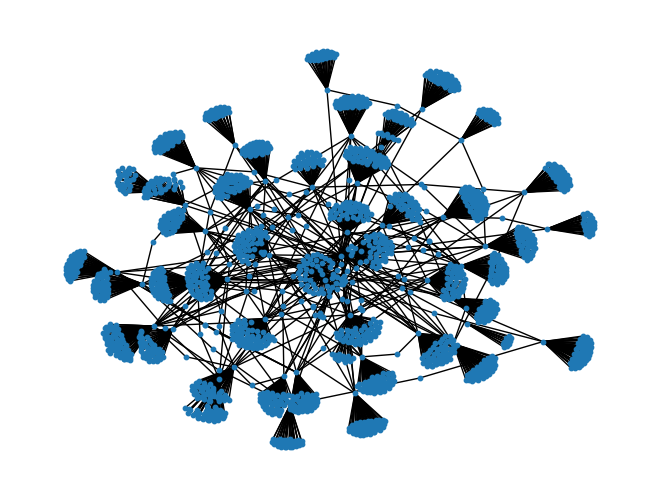

In [419]:
def create_subgraph(G, node):
    nodes = nx.single_source_shortest_path(G,node).keys()
    return G.subgraph(nodes)
H= create_subgraph(G,1229060372105134080)

nx.draw(H, node_size=10)

## Largest Connected Component

In [420]:
largest_subgraph = max((G.subgraph(c) for c in nx.connected_components(G)), key=len)

degrees_sub = [val for (_, val) in largest_subgraph.degree()]

largest_subgraph.number_of_nodes()#/3500 *100

1948

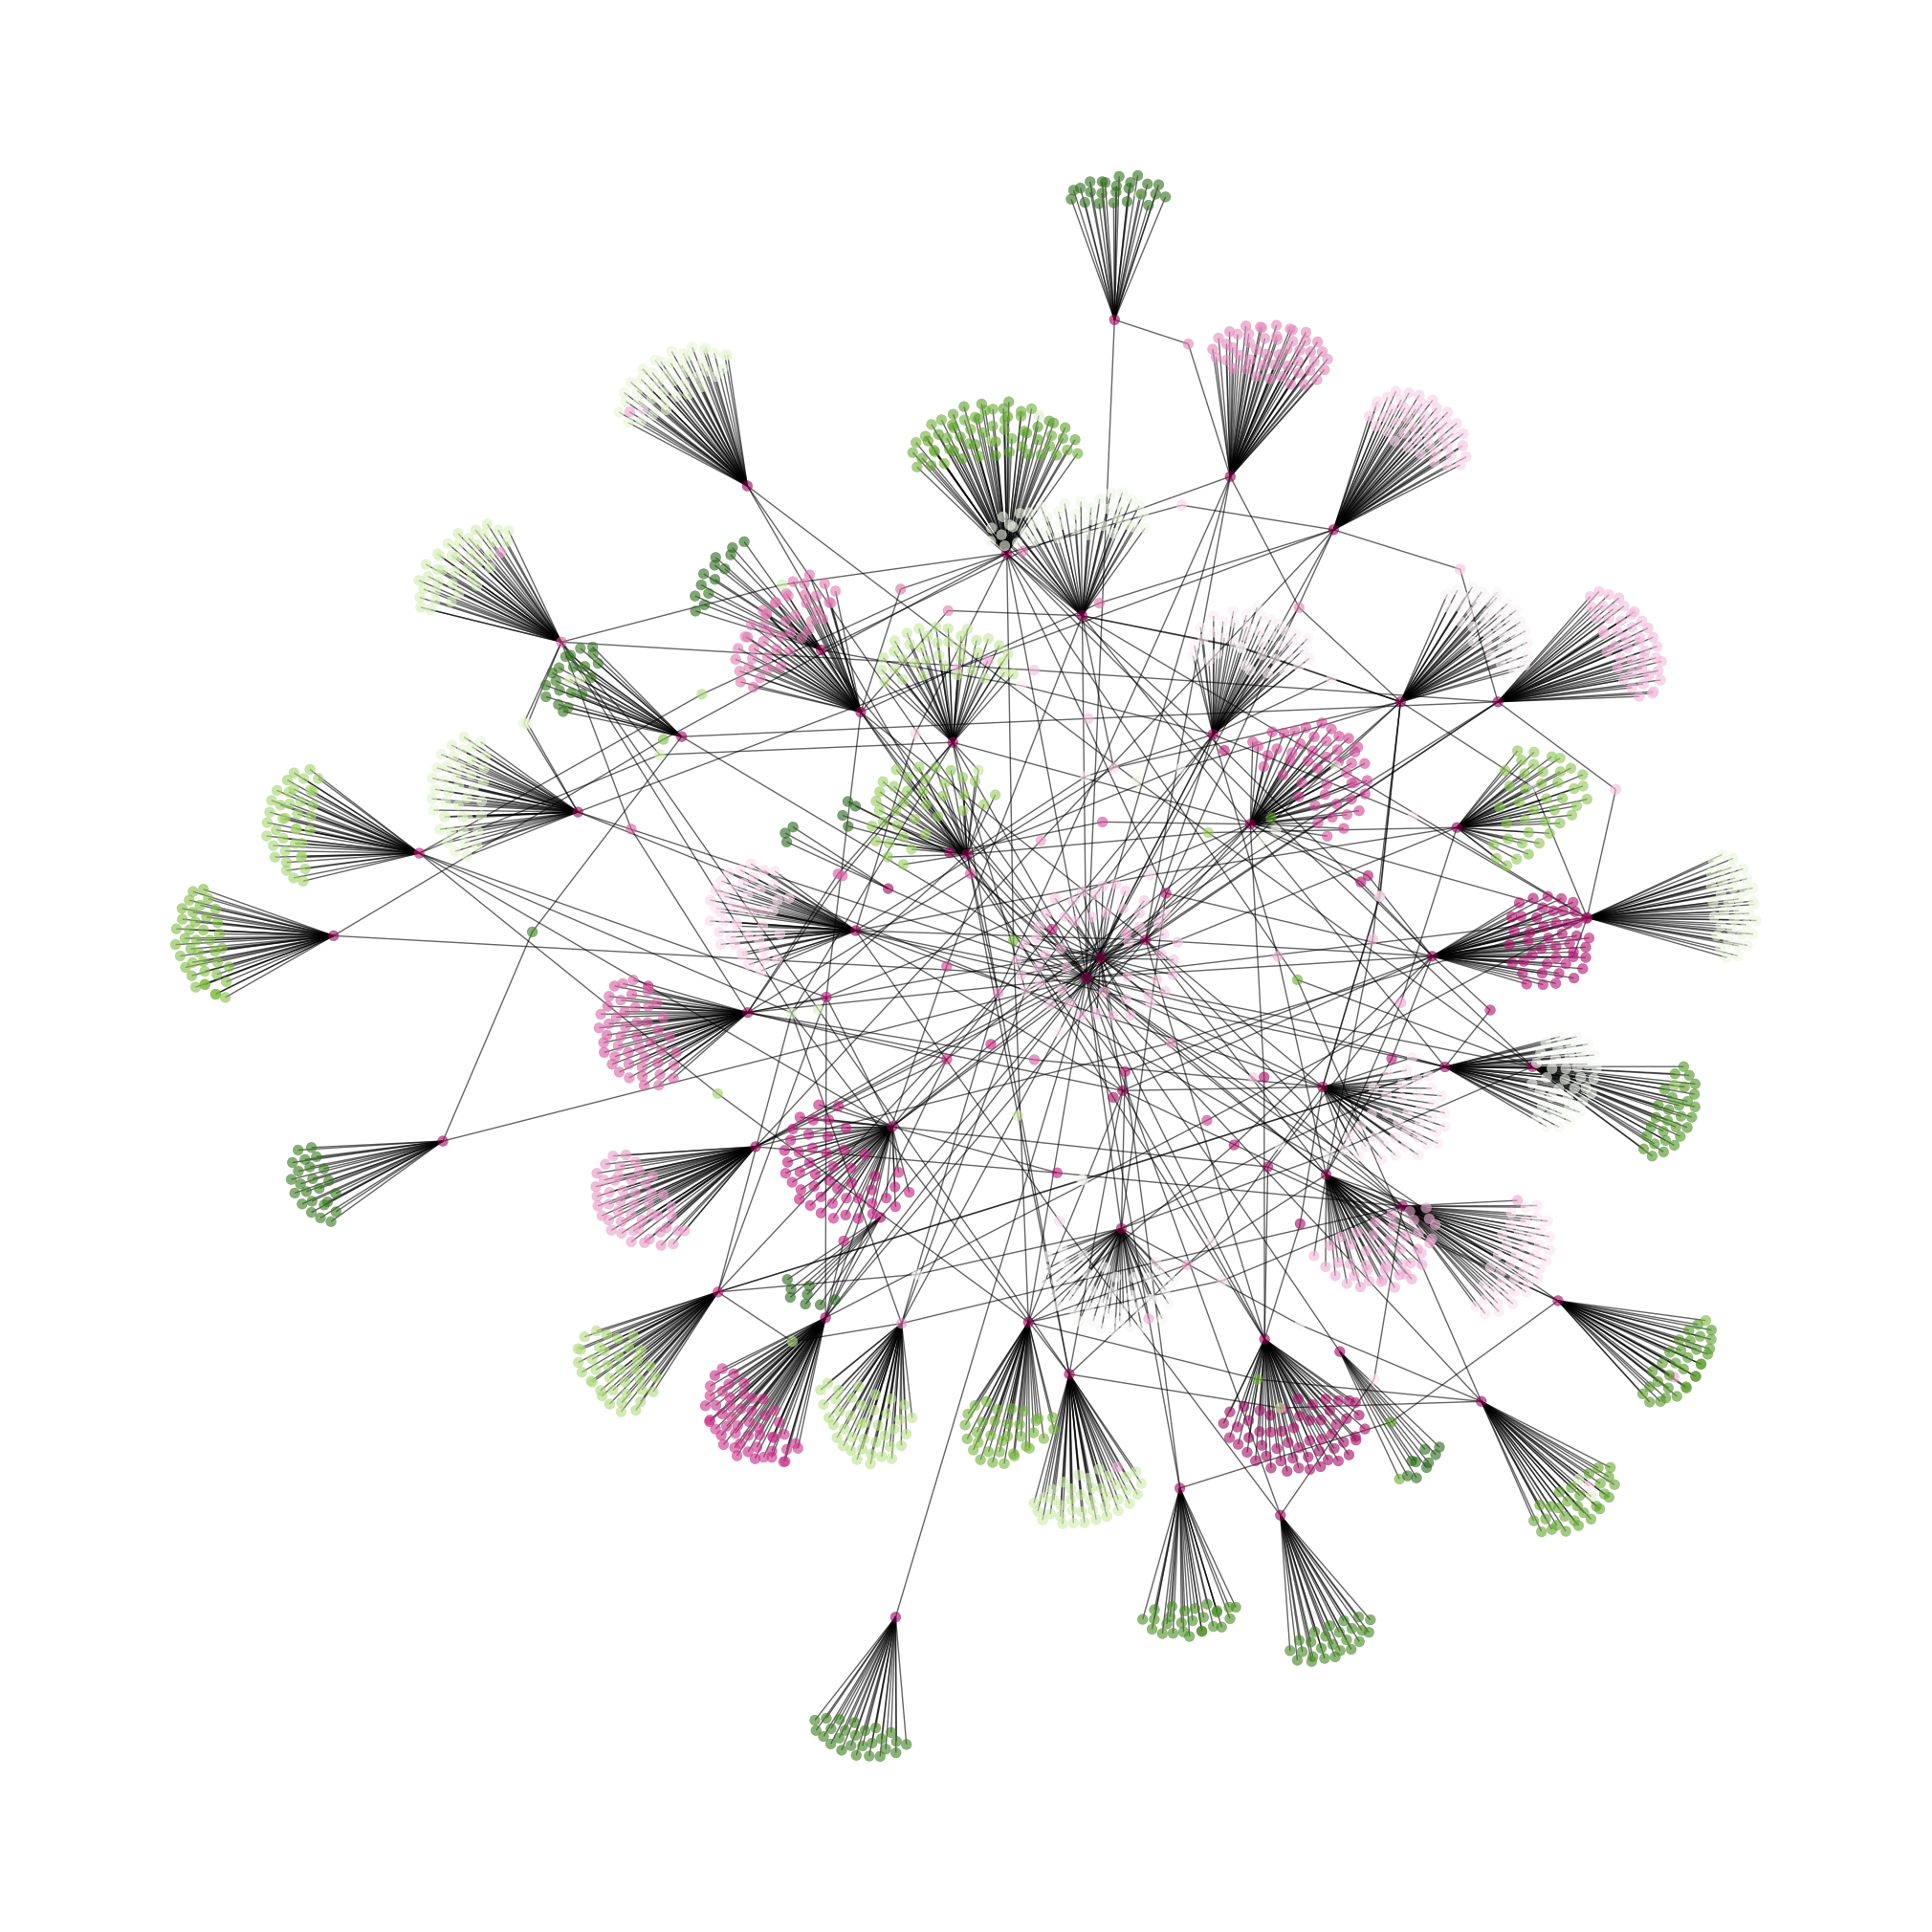

In [468]:
plt.figure(figsize = (20,20))
pos= nx.spring_layout(H)
nx.draw(H, pos=pos, node_color=range(1948), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
plt.savefig('graphfinal.png')
plt.show()

### Subgraph Visulization 

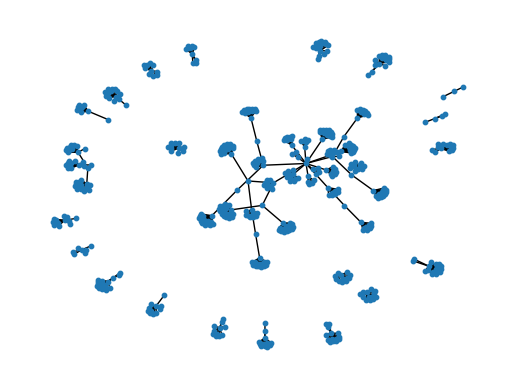

In [470]:
import random
random_sample_edges = random.sample(list(largest_subgraph.edges), 500)
G_sample = nx.Graph()
G_sample.add_edges_from(random_sample_edges)

plt.plot()
nx.draw(G_sample, node_size=10)
plt.show()

# Analysis 

## Centrality Analysis 

In [471]:
#Defines the draw function 
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=5, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    
    plt.axis('off')
    plt.show()

In [472]:
#Metrics 

def metrics(G):
    
    #trans = nx.transitivity(G)
    #avg = nx.average_clustering(G)
    #clust = nx.clustering(G)
    #assort = nx.degree_assortativity_coefficient(G)

    pos = nx.spring_layout(G)
    draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')
    draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
    draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
    return



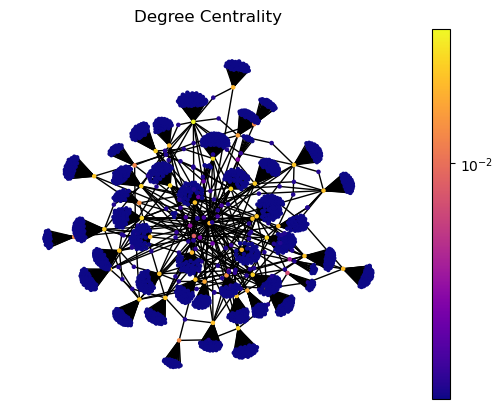

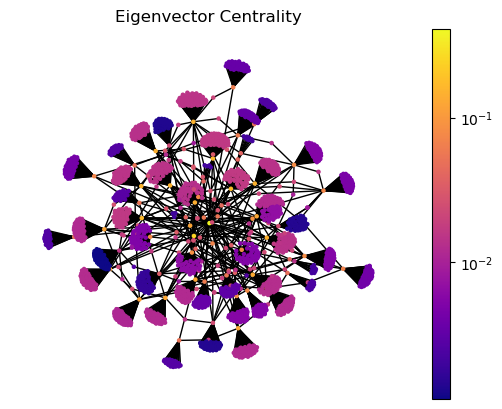

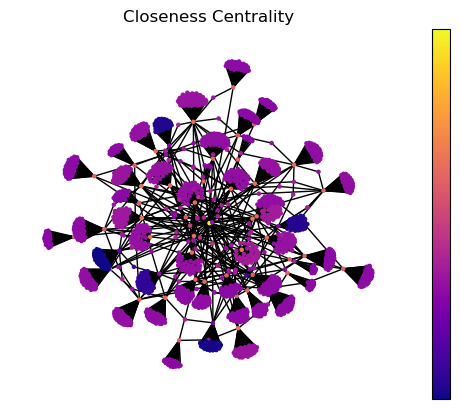

In [422]:
metrics(H)

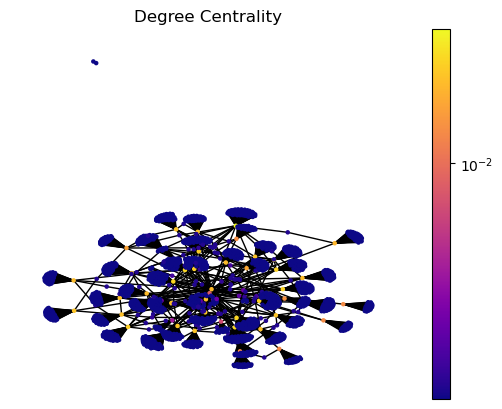

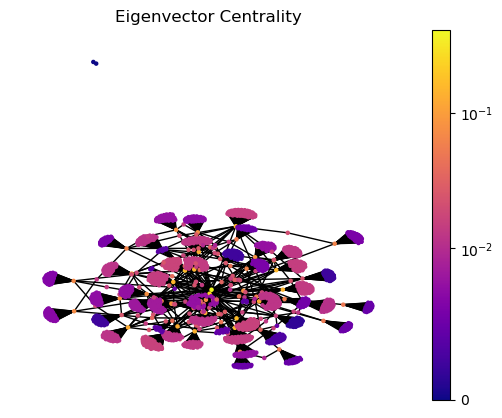

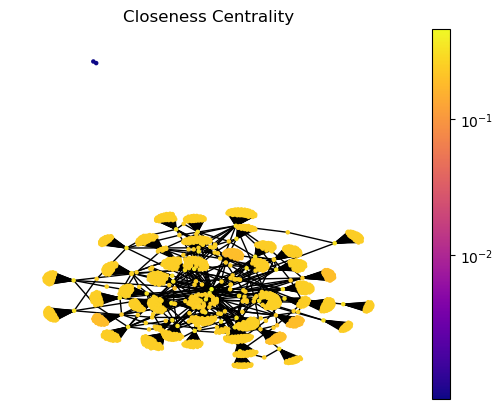

In [473]:
metrics(G)

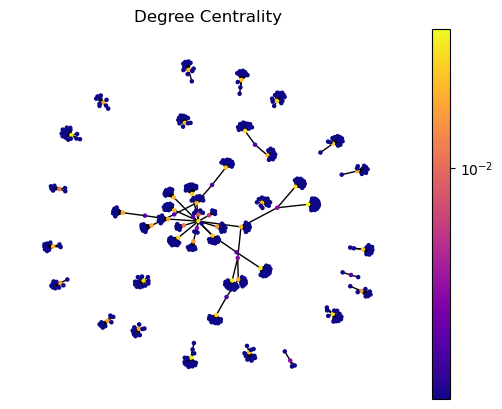

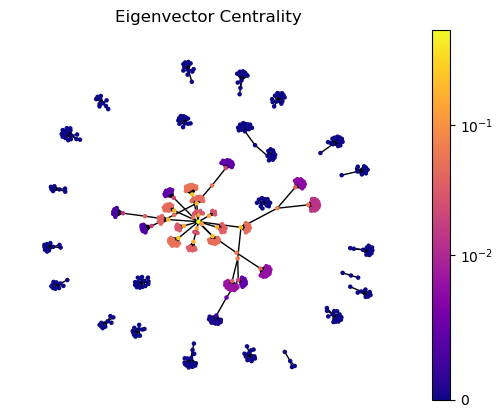

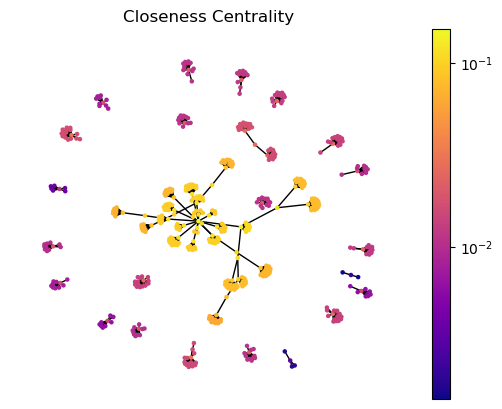

In [475]:
metrics(G_sample)

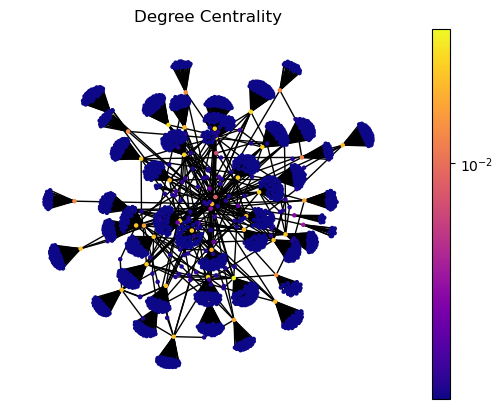

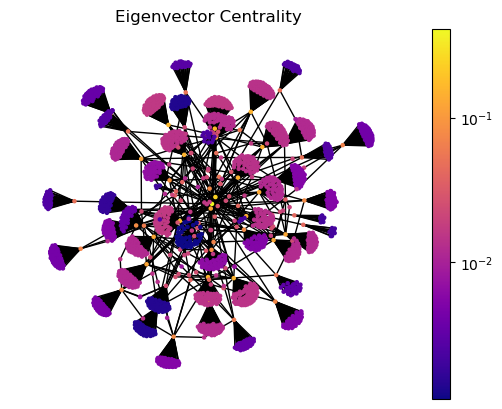

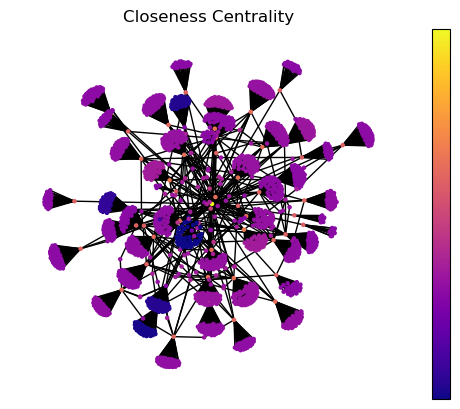

In [476]:
metrics(largest_subgraph)

## HK Model 

In [423]:
def HK(G,Tau, Time):
    """
    Description: Creates the Helgsemann-Krause in python. 

    Using the following formula:
        [INSERT FORMULA]

    Notes: 
        
    Args:
        G: undirected graph G
        Tau: float value ranging from 0.0 to 1.0
        Time: integer value for the number of epochs

    Output:
        x: list of values as time goes on according to the HK Model 
    """
    nodes = list(G.nodes) #Finds the node list of G
    n = G.number_of_nodes() #Finds the numeber of nodes in G from the node list 
    #Find max degree
    def d_alpha(G):
        """
        Description: Finds the alpha value for the graph (G) 

        Using the following formula:
            \alpha = 0.5/(max_i(di))

        Notes: 
            max_i: the maximum degree value in graph G

        Args:
            G: undirected graph G
            

        Output:
            alpha: alpha value for the graph 
        """
        MAX_DEG = max(d for _, d in G.degree()) #Gets the degrees of graph G and then picks the max
        alpha = 0.5 / MAX_DEG #Arthimatic for alpha
        return alpha

    def L_RW(G):
        """
        Description: Finds the random walk laplacian for the graph (G) 

        Using the following formula:
           [INSERT FORMULA]

        Args:
            G: undirected graph G
            n: number of nodes in graph G
        Output:
            L: the random walk laplacian matrix for graph G
        """
        L = np.zeros((n, n))
        for l in range(n):
            for m in range(n):
                if l == m:
                    L[l][m] = 1
                elif G.has_edge(nodes[l], nodes[m]) == True:
                    L[l][m] = -1/G.degree(nodes[l])
        return L 


    w = np.multiply((1-d_alpha(G)),np.identity(n)) - np.multiply(d_alpha(G),L_RW(G)) #Finds the mixing matrix 
    x = np.empty((n, Time)) #Creates an empty n x time matrix 
    x[:,0] = np.random.uniform(0, 1, n) #Creates an intial vector and puts it into the first column of x 


    #HK Confidence
    for t in range(1,Time):
        for i in range(n):
            sum1 = 0 #Sum for the numerator
            sum2 = 0 #Sum for the denominator
            x_i = x[i] [t-1] #Gets the previous state of x_i
            for j in range(n): 
                x_j = x[j][t-1] #Defines x_j similarly to x_i
                d_ij = np.abs(x_i - x_j) #Finds the absolute value of x_i and x_j
                u = 1 if d_ij <= Tau else 0 #U function 
                sum1 += w[i][j] * u * x_j #Adds to the numerator sum 
                sum2 += w[i][j] * u #Adds to the denominator sum 
            x[i][t]= (sum1 / sum2)
            
    plt.figure(figsize = (10,10)) #Creates the figure
    for k in range(len(list(G.nodes()))): #Range for the graph 
        plt.plot(x[k,:]) #Adds the plots to the figures 
    return(plt.show())

In [291]:
HK(G_sample,0.1,4000) #With Tau value of 0.1

KeyboardInterrupt: 

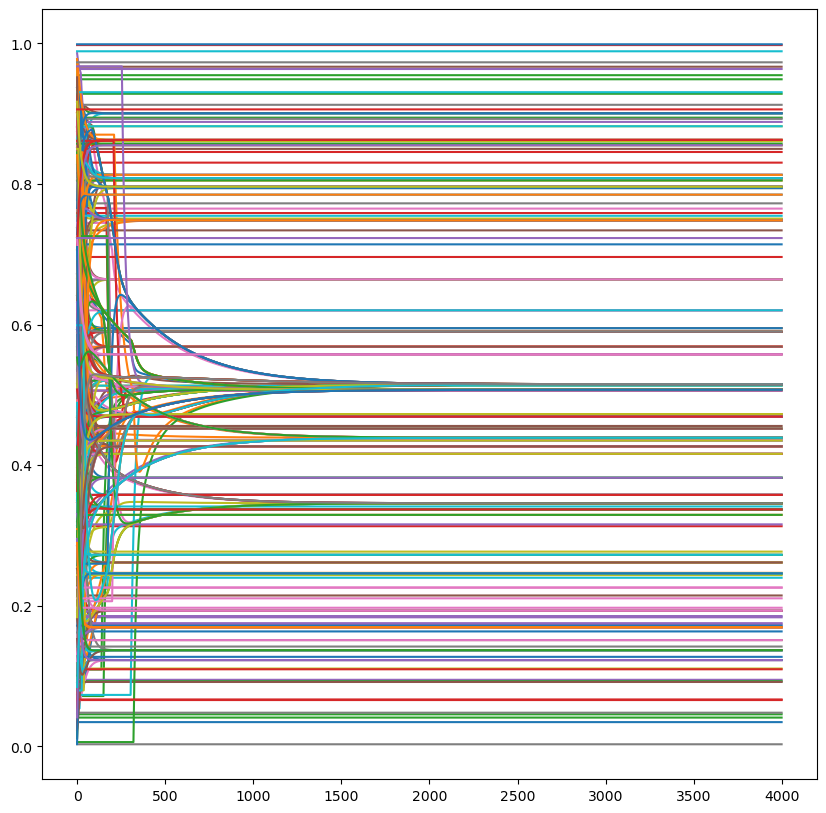

In [45]:
HK(G_sample,0.5,4000) #With Tau value of 0.5


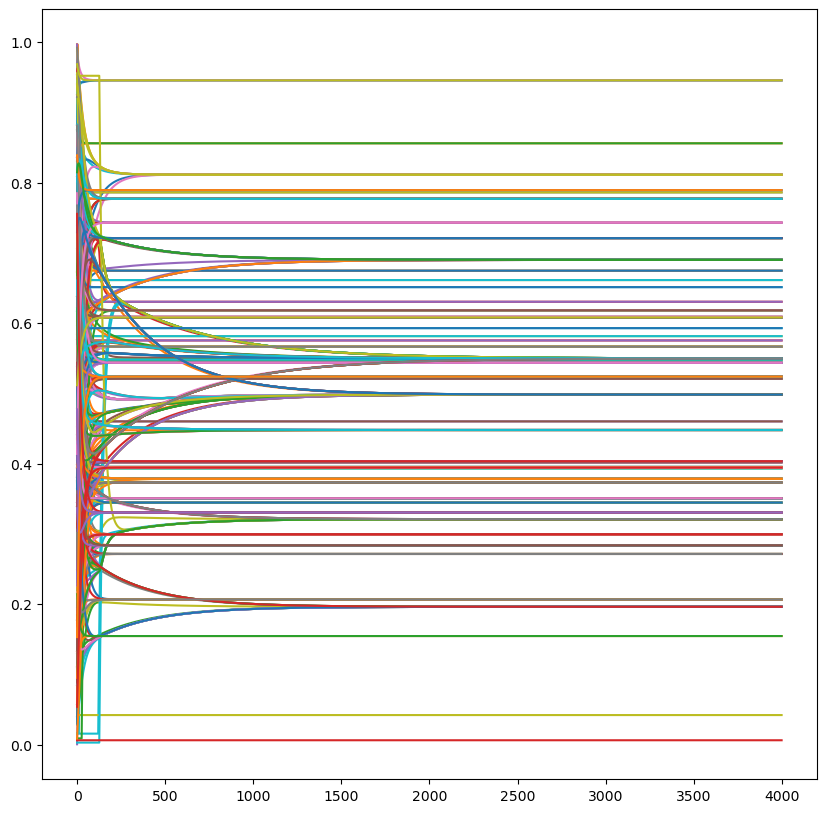

In [46]:
HK(G_sample,0.7,4000) #With Tau value of 0.7

## DeGroot Model

In [426]:
def degroot_model(G, timesteps):
    # initialize the beliefs of each node to 0
    beliefs = [np.random.rand() for _ in range(G.number_of_nodes())]

    # simulate the convergence of the model over the specified number of timesteps
    for t in range(timesteps):
        # update the beliefs of each node using the DeGroot model
        for i, node in enumerate(G.nodes()):
            beliefs[i] = (G.degree(node, weight='weight') * beliefs[i])
        #beliefs = [sum(G.degree(i, weight='weight') * beliefs[i] for i in G[node]) for node in G]

    # normalize the beliefs of each node so that they sum to 1
    beliefs = [b / sum(beliefs) for b in beliefs]

    #print(beliefs)
    # visualize the convergence over time
    plt.plot(range(t+1), beliefs)
    plt.xlabel('Timestep')
    plt.ylabel('Belief')

    plt.show()

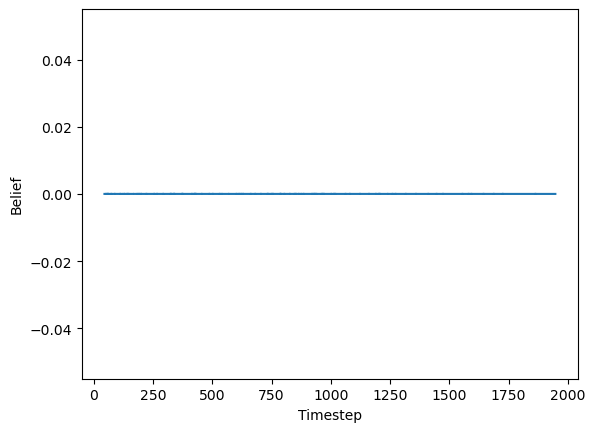

In [427]:
degroot_model(largest_subgraph, 1948)

## Sznjad

In [428]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op

In [429]:
# Model selection
model = op.SznajdModel(largest_subgraph)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.4)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2500)

In [430]:
node_dict = {}
for i, dictionary in enumerate(iterations):
    for node in dictionary['status']:
        if i == 0:
            node_dict[node] = [dictionary['status'][node]]
        else:
            node_dict[node].append(dictionary['status'][node])

In [431]:
df_test = pd.DataFrame(iterations)
pd.json_normalize(df_test['status'])

1.229060e+18  1.324867e+18  1.324866e+18  1.324866e+18  1.324866e+18  \
0              1.0           0.0           0.0           0.0           0.0   
1              NaN           NaN           NaN           NaN           NaN   
2              0.0           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
2495           NaN           NaN           NaN           NaN           NaN   
2496           NaN           NaN           NaN           NaN           NaN   
2497           NaN           NaN           NaN           NaN           NaN   
2498           NaN           NaN           NaN           NaN           NaN   
2499           1.0           NaN           NaN           NaN           NaN   

      1.324866e+18  1.324866e+18  1.324865e+18  1.324865e+18  1.324865e+18  \
0              0.0           1.0           0.0           1.0           1.0   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
2495           NaN           NaN           NaN           NaN           NaN   
2496           NaN           NaN           NaN           NaN           NaN   
2497           NaN           NaN           NaN           NaN           NaN   
2498           NaN           NaN           NaN           NaN           NaN   
2499           NaN           NaN           NaN           NaN           NaN   

      ...  1.134920e+18  1.228762e+18  8.699766e+17  9.602051e+17  \
0     ...           1.0           1.0           1.0           1.0   
1     ...           NaN           NaN           NaN           NaN   
2     ...           NaN           NaN           NaN           NaN   
3     ...           NaN           NaN           NaN           NaN   
4     ...           NaN           NaN           NaN           NaN   
...   ...           ...           ...           ...           ...   
2495  ...           NaN           NaN           NaN           NaN   
2496  ...           NaN           NaN           NaN           NaN   
2497  ...           NaN           NaN           NaN           NaN   
2498  ...           NaN           NaN           NaN           NaN   
2499  ...           NaN           NaN           NaN           NaN   

      1.150809e+18  1.295371e+18  1.324465e+18  1.293700e+18  1.209547e+18  \
0              1.0           1.0           1.0           1.0           1.0   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
2495           NaN           NaN           NaN           NaN           NaN   
2496           NaN           NaN           NaN           NaN           NaN   
2497           NaN           NaN           NaN           NaN           NaN   
2498           NaN           NaN           NaN           NaN           NaN   
2499           NaN           NaN           NaN           NaN           NaN   

      1.118158e+18  
0              1.0  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
2495           NaN  
2496           NaN  
2497           NaN  
2498           NaN  
2499           NaN  

[2500 rows x 2092 columns]

## GCN Analysis 

In [278]:
import networkx as nx
import torch
import torch.nn as nn
import sklearn 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# create a GCN model for the graph
class GCN(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()

        # define the model layers
        self.gcn_layer = nn.Linear(in_features + hidden_features, hidden_features)
        self.output_layer = nn.Linear(hidden_features, out_features)

    def forward(self, x, adjacency_matrix):
        # apply the GCN layer using the adjacency matrix
        hidden = torch.relu(self.gcn_layer(torch.cat((x, torch.mm(adjacency_matrix, x)), dim=1)))

        # apply the output layer
        output = self.output_layer(hidden)

        return output

gcn = GCN(in_features=1, hidden_features=1, out_features=1)

# create an input tensor for the graph with shape (number of nodes, number of input features)
x = torch.randn(largest_subgraph.number_of_nodes(), 1)

# create an adjacency matrix for the graph with shape (number of nodes, number of nodes)
adjacency_matrix = torch.tensor(nx.to_numpy_matrix(largest_subgraph), dtype=torch.float)

# apply the GCN model to the input tensor and adjacency matrix
output = gcn(x, adjacency_matrix)

# reduce the dimensions of the output using TSNE
tsne = TSNE(n_components=2)
embedding_2d = tsne.fit_transform(tsne)

# plot the 2d embedding of the graph
plt.scatter(embedding_2d[:,0], embedding_2d[:,1])
plt.show()

AttributeError: 'TSNE' object has no attribute 'shape'

## Opinion Evolution 

In [438]:
from networkx.algorithms import community
Louve_Comm = nx.community.louvain_communities(G)

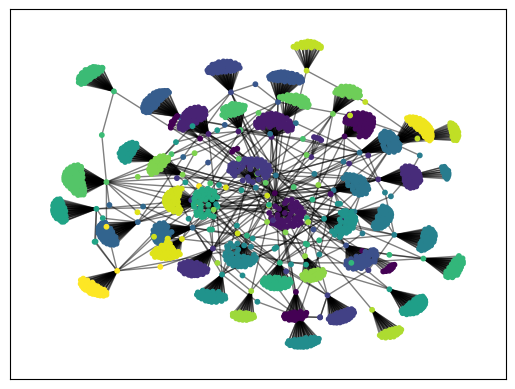

In [271]:
import matplotlib.cm as cm
import community.community_louvain as community_louvain
#first compute the best partition

# load the karate club graph

partition = community_louvain.best_partition(largest_subgraph)

# draw the graph
pos = nx.spring_layout(largest_subgraph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(largest_subgraph, pos, partition.keys(), node_size=10,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(largest_subgraph, pos, alpha=0.5)
plt.show()

In [440]:
node_color = []
for edge in G.edges(data=True):
    #print(edge)
    if 'Positive' in edge[2]['sentiment']:
        node_color.append('green')
    else:
        node_color.append('red')

In [441]:
#G.nodes(data=True)

In [442]:
import matplotlib.cm as cm
import community.community_louvain as community_louvain

NetworkXError: Node 1.3248592038617539e+18 has no position.

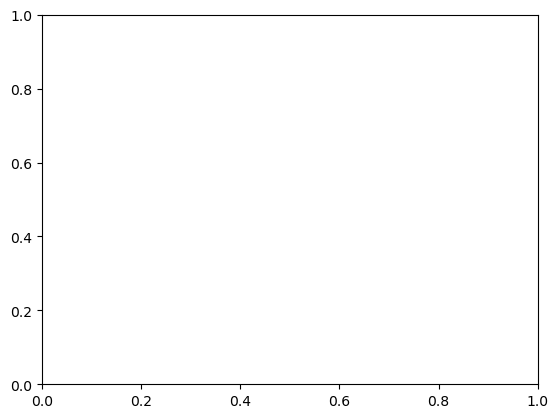

In [443]:
# draw the graph
pos = nx.spring_layout(largest_subgraph)
# color the nodes according to their partition
cmap = cm.get_cmap('PiYG')
nx.draw_networkx_nodes(largest_subgraph, pos, partition.keys(), node_size=10,
                       cmap=cmap, node_color=node_color)
nx.draw_networkx_edges(largest_subgraph, pos, alpha=0.5)
plt.show()

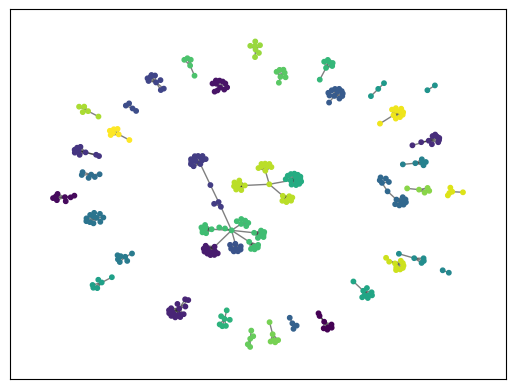

In [269]:
partition = community_louvain.best_partition(G_sample)

# draw the graph
pos = nx.spring_layout(G_sample)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_sample, pos, partition.keys(), node_size=10,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_sample, pos, alpha=0.5)
plt.show()